# **Importacion de las librerias**

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importacion de la base de datos**

In [ ]:
drive.mount("/content/gdrive")  # utiliza comando

!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Universidad/7mo Semestre/Inteligencia artificial avanzada


In [ ]:
#put your own path in google drive
%cd "/content/gdrive/MyDrive/Universidad/7mo Semestre/Inteligencia artificial avanzada"
!ls

/content/gdrive/MyDrive/Universidad/7mo Semestre/Inteligencia artificial avanzada
breast-cancer.csv  ds_salaries.csv	  iris.data	   Valhalla23.csv
Colabs		   Estatura-peso_HyM.csv  PlayDataset.csv  wine.data


Importamos el dataset, y hacemos las acciones necesarias para limpiarlo(eliminamos la columna 'id' y cambiamos los valores del diagnostico por 0 y 1).

# **Analisis exploratorio**

In [ ]:
df = pd.read_csv("breast-cancer.csv")
df = df.drop(["id"], axis = 1)
df.diagnosis = df.diagnosis.map({"M":1, "B":0})
df.shape

(569, 31)

Realizamos un heatmap para ver que variables estan influyen mas, ya sea positiva o negativamente sobre nuestra variable dependiente, que en este caso sera 'diagnosis'.

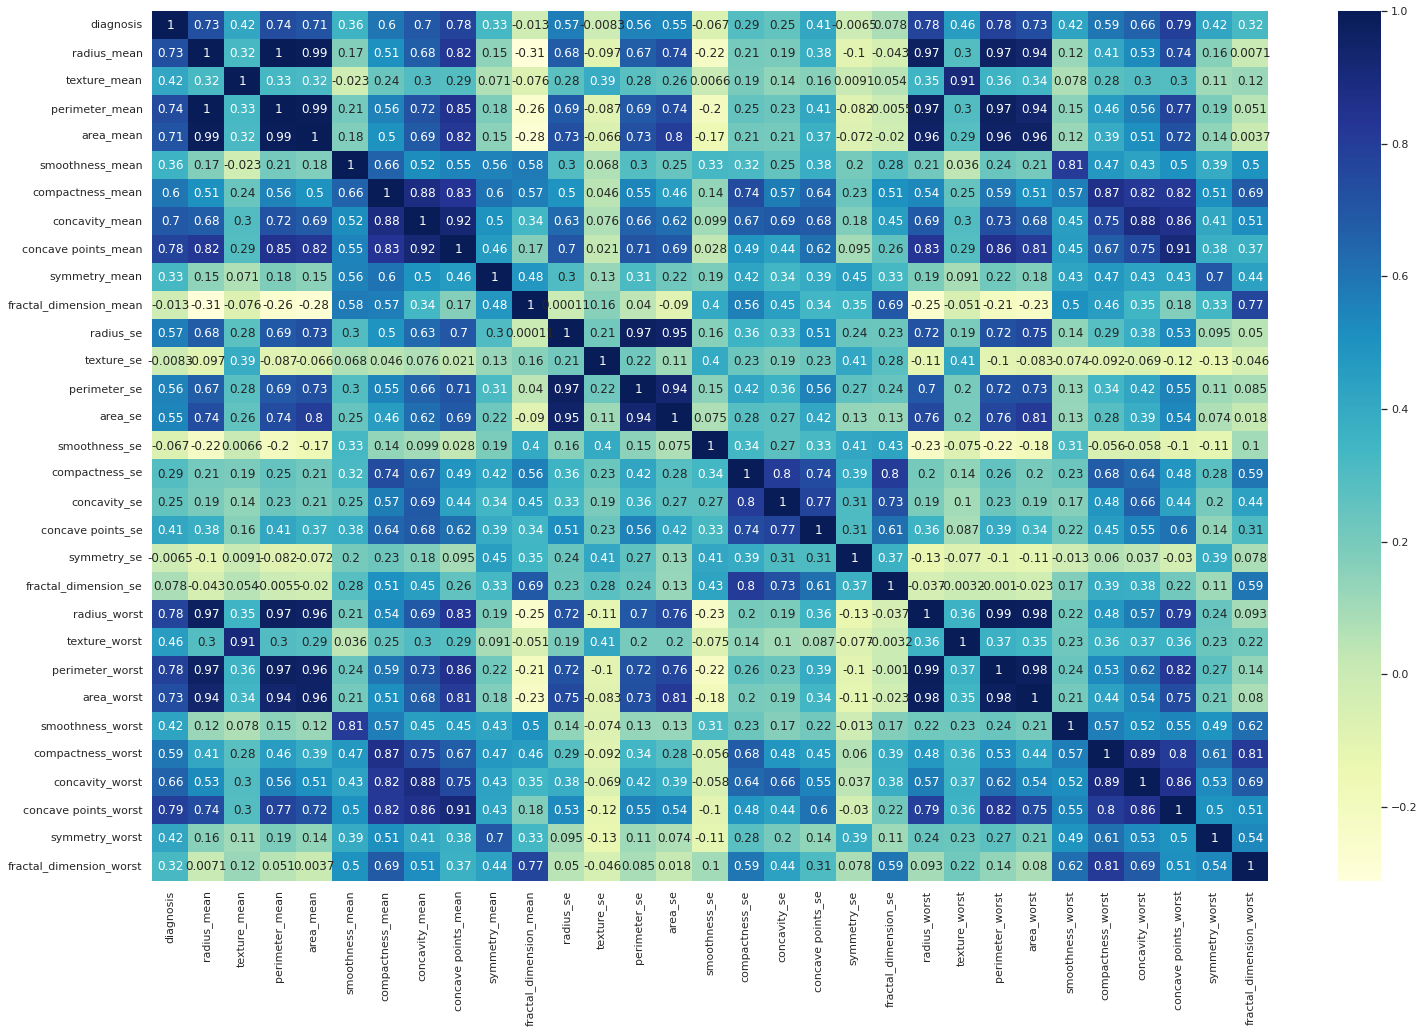

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

Eliminamos las columnas que tienen minima relacion o relacion nula con nuestra variable a predecir.

In [ ]:
df = df.drop(["fractal_dimension_se","symmetry_se","smoothness_se","texture_se", "fractal_dimension_mean"], axis = 1)
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


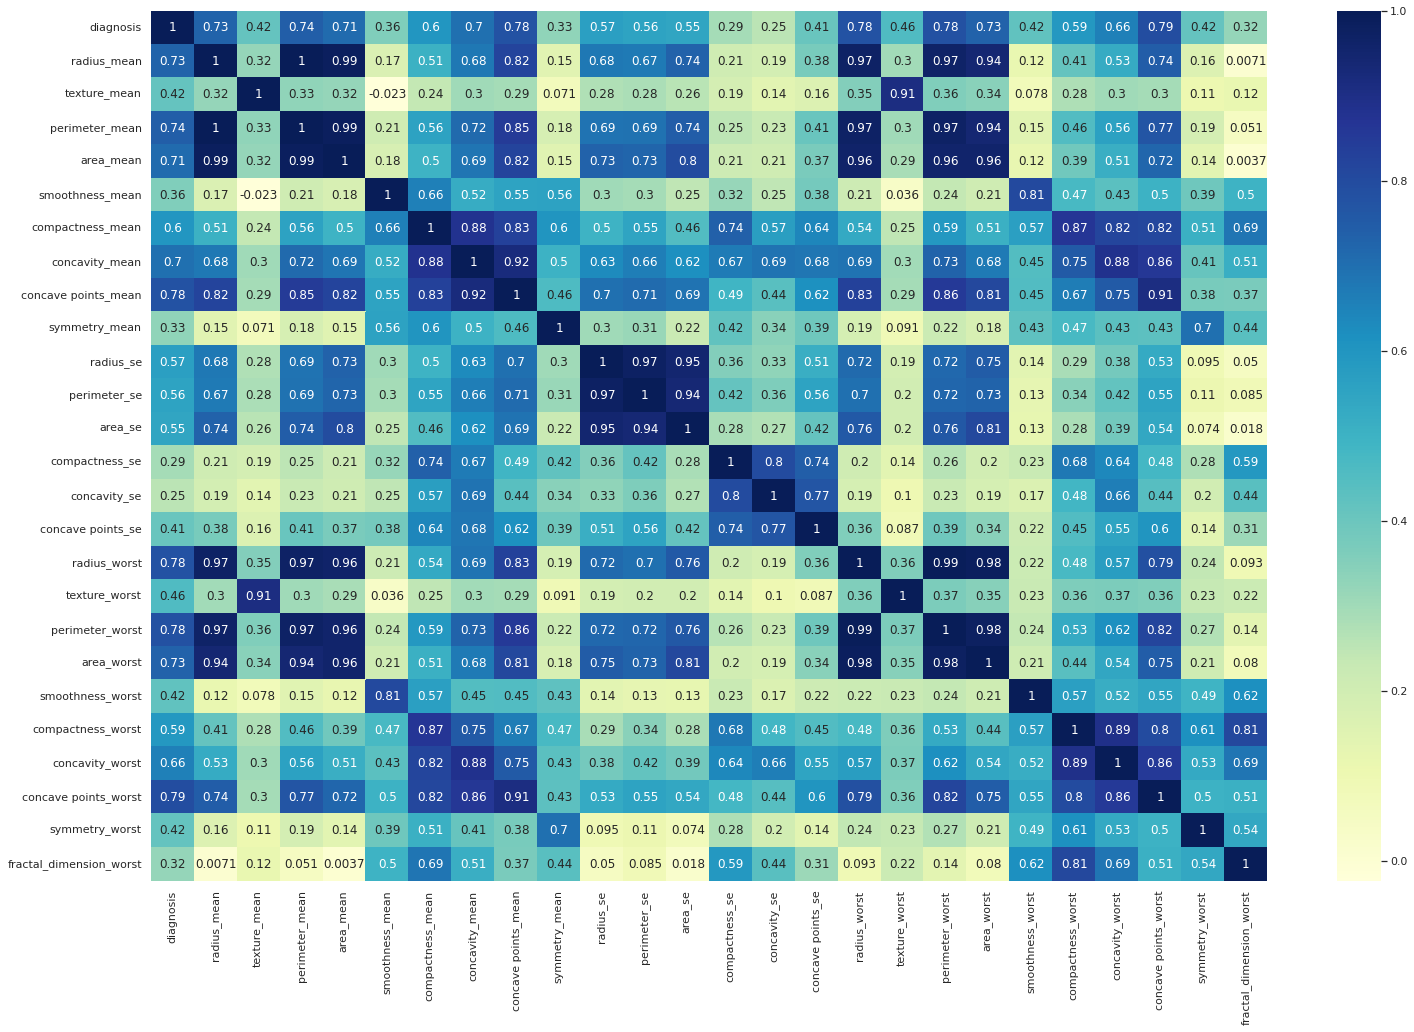

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

Dividimos el dataframe a mano con ayuda de la libreria numpy, se divide de manera aleatoria, 70% del dataframe sera para training y 30% para testing.

# **Tratamiento de datos para el algoritmo**

In [ ]:
p_train = 0.70 # Porcentaje de train.

df['is_train'] = np.random.uniform(0, 1, len(df)) <= p_train
train, test = df[df['is_train']==True], df[df['is_train']==False]
df = df.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  396
Ejemplos usados para test:  173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Una vez realizado la division eliminamos laa columnaa de soporte('is_train') para realizar esta division

In [ ]:
train = train.drop(["is_train"], axis = 1)
test = test.drop(["is_train"], axis = 1)

In [ ]:
train.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


Declaramos nuestras variables dependientes y la variable independiente tanto en el dataframe de training como en el de testing.

In [ ]:
x_train = train.drop(["diagnosis"], axis = 1)
y_train = train[["diagnosis"]]

In [ ]:
x_test = test.drop(["diagnosis"], axis = 1)
y_test = test[["diagnosis"]]

In [ ]:
# Datos de entrenamiento
x_train = x_train.values
y_train = y_train.values

# Datos para testing
x_test = x_test.values
y_test = y_test.values

In [ ]:
x_train.T

array([[1.799e+01, 1.969e+01, 1.142e+01, ..., 2.013e+01, 1.660e+01,
        7.760e+00],
       [1.038e+01, 2.125e+01, 2.038e+01, ..., 2.825e+01, 2.808e+01,
        2.454e+01],
       [1.228e+02, 1.300e+02, 7.758e+01, ..., 1.312e+02, 1.083e+02,
        4.792e+01],
       ...,
       [2.654e-01, 2.430e-01, 2.575e-01, ..., 1.628e-01, 1.418e-01,
        0.000e+00],
       [4.601e-01, 3.613e-01, 6.638e-01, ..., 2.572e-01, 2.218e-01,
        2.871e-01],
       [1.189e-01, 8.758e-02, 1.730e-01, ..., 6.637e-02, 7.820e-02,
        7.039e-02]])

Verificamos que tengan la misma cantidad de columnas y vemos sus dimensiones.

In [ ]:
print("Dimensiones del training")
print("Dimension de x: ", x_train.shape)
print("Dimension de y: ", y_train.shape)

print("Dimensiones del testing")
print("Dimension de x: ", x_test.shape)
print("Dimension de y: ", y_test.shape)

Dimensiones del training
Dimension de x:  (396, 25)
Dimension de y:  (396, 1)
Dimensiones del testing
Dimension de x:  (173, 25)
Dimension de y:  (173, 1)


Haremos traspuestas nuestras columnas para asi poder implementarlas en la regresion logistica.

In [ ]:
x_train = x_train.T
y_train = y_train.reshape(1, x_train.shape[1])

x_test = x_test.T
y_test = y_test.reshape(1, x_test.shape[1])

In [ ]:
print("Dimensiones del training despues de la transpuesta")
print("Dimension de x", x_train.shape)
print("Dimension de y", y_train.shape)

print("Dimensiones del testing despues de la transpuesta")
print("Dimension de x", x_test.shape)
print("Dimension de y", y_test.shape)

Dimensiones del training despues de la transpuesta
Dimension de x (25, 396)
Dimension de y (1, 396)
Dimensiones del testing despues de la transpuesta
Dimension de x (25, 173)
Dimension de y (1, 173)


# **Algoritmo**

Definimos la funcion de la sigmoide

In [ ]:
def sigmoid(x):
  s = 1/(1+np.exp(-(x)))
  return s

In [ ]:
print(x_train.shape[1])
print(x_train.shape[0])

396
25


In [ ]:
def model(x_train, y_train, alpha, iterations):
  m = x_train.shape[1] # Registros → Valores de las variables
  n = x_train.shape[0] # Columnas → Variables

  w = np.zeros([n,1])

  lista_costo = []
  """
  Creamos un vector con tamaño igual al numero de variables
  estos seran los pesos iniciales de nuestras variables.
  """
  b = 0

  for i in range(iterations):
    sigma = np.dot(w.T, x_train) + b # Prediccion probabilistica
    y_pred = sigmoid(sigma)

    # Funcion de costo
    costo = -(1/m)*np.sum( y_train*np.log(y_pred) + (1-y_train)* np.log(1-y_pred) )

    # Gradiente descendiente
    dw = (1/m)*np.dot(y_pred-y_train, x_train.T)
    db = (1/m)*np.sum(y_pred-y_train)

    w = w - alpha*dw.T
    b = b - alpha*db

    # Descenso de nuestra funcion de costo
    lista_costo.append(costo)

    if(i%(iterations/10) == 0): # Comentar
      print("En la iteracion numero", i, "el error es de : ", costo)
    
  return w,b,lista_costo

In [ ]:
iterations = 100000
alpha = 0.00000000015 # Cantidad de ceros: 9
w, b, lista_costo = model(x_train, y_train, alpha, iterations)

En la iteracion numero 0 el error es de :  0.6931471805599452
En la iteracion numero 10000 el error es de :  0.6824291478122663
En la iteracion numero 20000 el error es de :  0.678775551160532
En la iteracion numero 30000 el error es de :  0.6770848507702075
En la iteracion numero 40000 el error es de :  0.675960446073828
En la iteracion numero 50000 el error es de :  0.6750064155741115
En la iteracion numero 60000 el error es de :  0.6741072089631325
En la iteracion numero 70000 el error es de :  0.6732284459465674
En la iteracion numero 80000 el error es de :  0.6723597566987533
En la iteracion numero 90000 el error es de :  0.6714979672957443


Graficamos la disminucion del error segun el numero de iteraciones para ver en que momento existe un estancamiento del algoritmo.

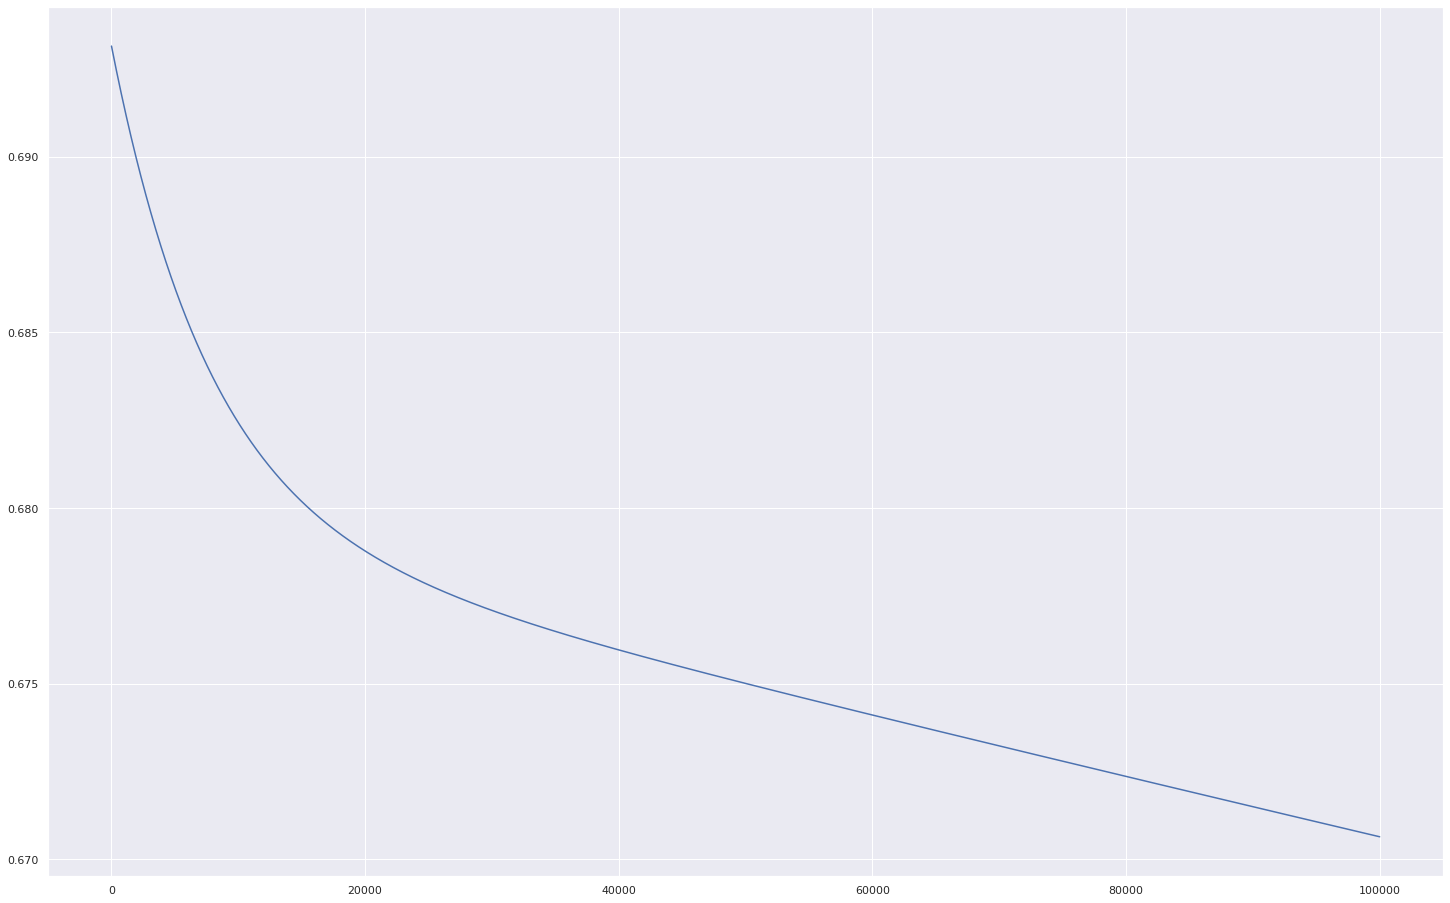

In [ ]:
plt.plot(np.arange(iterations), lista_costo)
plt.show()

# **Precision**

Ahora veremos la precision del modelo:

In [ ]:
def accuracy(x_test, y_test, w, b):
  sigma = np.dot(w.T, x_test) + b # Prediccion probabilistica
  y_pred = sigmoid(sigma)

  y_pred = y_pred > 0.5
  y_pred = np.array(y_pred, dtype = 'int64')
  """
  Con las dos lineas de codigo anteriores convertimos a booleanos
  y luego a un formato binario(0,1), esto recordando que con la
  funcion sigmoide los valores menores a 0.5 se tomaran como 0 
  y los mayores a 0.5 como 1
  """
  acc = (1 - np.sum(np.absolute(y_pred - y_test))/y_test.shape[1])*100
  print("La precision del modelo es: ", round(acc, 2), "%")

Calculamos la precision en el dataset de entrenamiento:

In [ ]:
accuracy(x_train, y_train, w, b)

La precision del modelo es:  38.38 %


Calculamos la precision en el dataset de validacion:

In [ ]:
accuracy(x_test, y_test, w, b)

La precision del modelo es:  34.68 %


# **Segunda prueba del algoritmo con diferentes valores**

In [ ]:
iterations = 100000
alpha = 0.0015 # Cantidad de ceros: 2
w, b, lista_costo = model(x_train, y_train, alpha, iterations)

En la iteracion numero 0 el error es de :  0.6931471805599452


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


En la iteracion numero 10000 el error es de :  nan
En la iteracion numero 20000 el error es de :  nan
En la iteracion numero 30000 el error es de :  nan
En la iteracion numero 40000 el error es de :  nan
En la iteracion numero 50000 el error es de :  nan
En la iteracion numero 60000 el error es de :  nan
En la iteracion numero 70000 el error es de :  nan
En la iteracion numero 80000 el error es de :  nan
En la iteracion numero 90000 el error es de :  nan


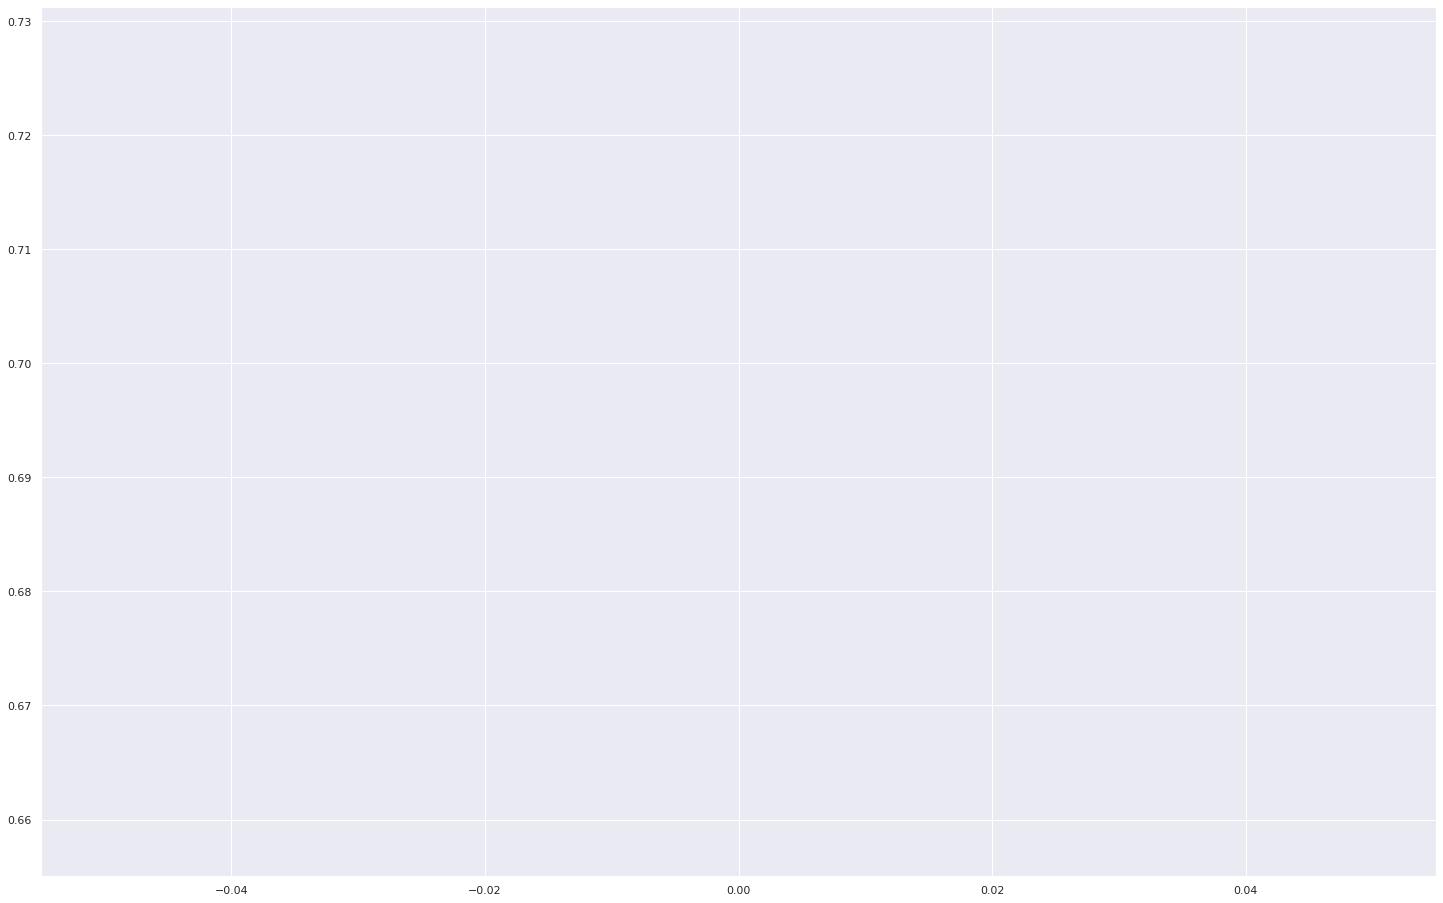

In [ ]:
plt.plot(np.arange(iterations), lista_costo)
plt.show()

In [ ]:
accuracy(x_train, y_train, w, b)

La precision del modelo es:  87.37 %


In [ ]:
accuracy(x_test, y_test, w, b)

La precision del modelo es:  90.75 %


# **Tercera prueba del algoritmo con diferentes valores**

In [ ]:
iterations = 100000
alpha = 0.00000015 # Cantidad de ceros: 6
w, b, lista_costo = model(x_train, y_train, alpha, iterations)

En la iteracion numero 0 el error es de :  0.6931471805599452
En la iteracion numero 10000 el error es de :  0.42751230473743684
En la iteracion numero 20000 el error es de :  0.36344637913266425
En la iteracion numero 30000 el error es de :  0.33010722155541194
En la iteracion numero 40000 el error es de :  0.30960700185790263
En la iteracion numero 50000 el error es de :  0.29565263638786027
En la iteracion numero 60000 el error es de :  0.2854868756395699
En la iteracion numero 70000 el error es de :  0.27772811329279523
En la iteracion numero 80000 el error es de :  0.2716061588903296
En la iteracion numero 90000 el error es de :  0.26665415410097437


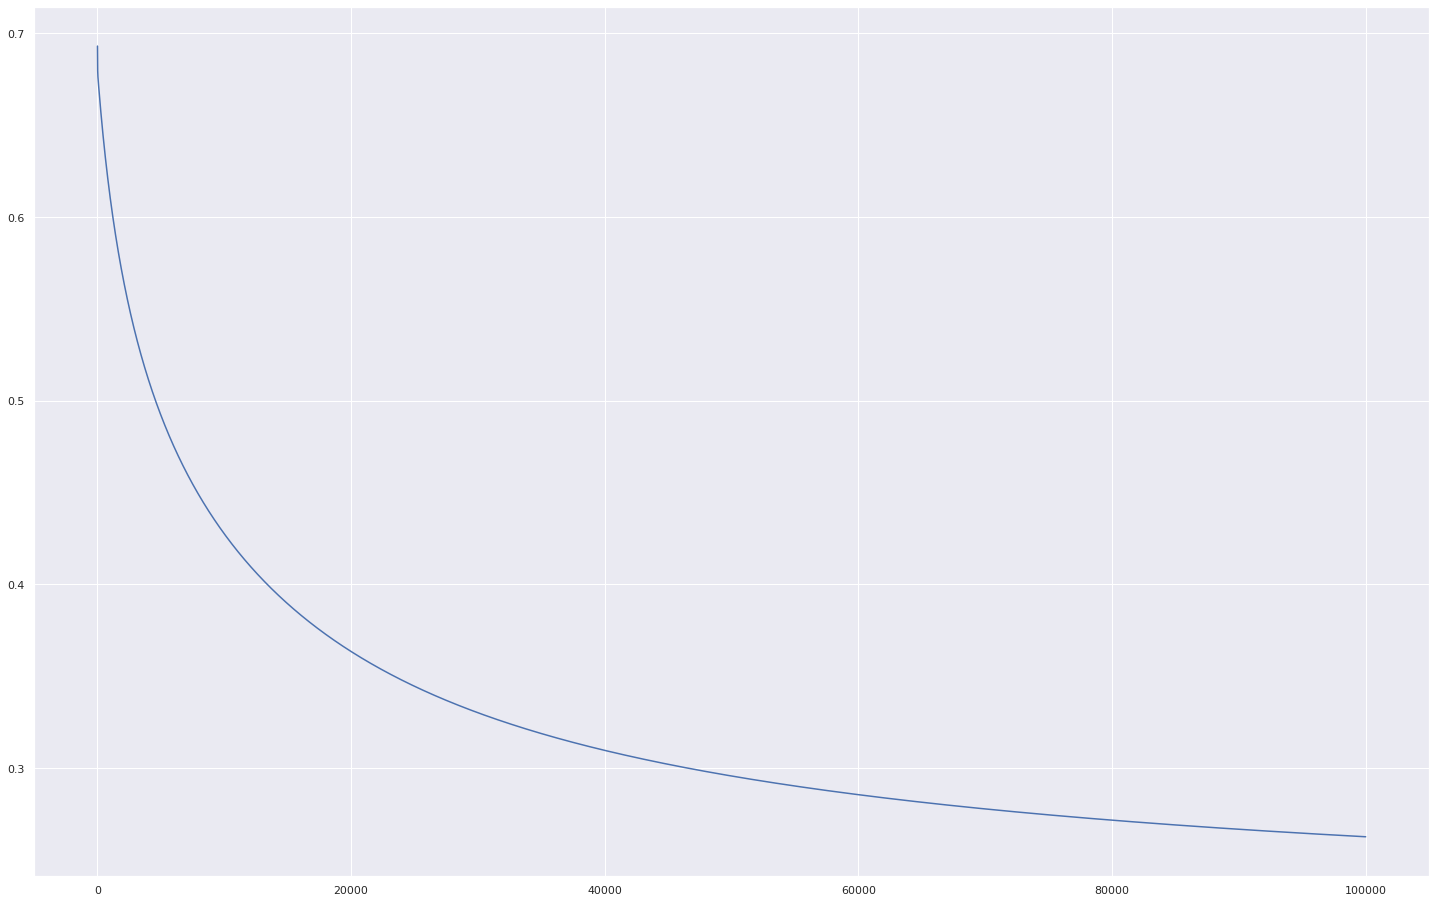

In [ ]:
plt.plot(np.arange(iterations), lista_costo)
plt.show()

In [ ]:
accuracy(x_train, y_train, w, b)

La precision del modelo es:  90.66 %


In [ ]:
accuracy(x_test, y_test, w, b)

La precision del modelo es:  95.95 %


# **Cuarta prueba del algoritmo con diferentes valores:**

In [ ]:
iterations = 100000
alpha = 0.000000015 # Cantidad de ceros: 7
w, b, lista_costo = model(x_train, y_train, alpha, iterations)

En la iteracion numero 0 el error es de :  0.6931471805599452
En la iteracion numero 10000 el error es de :  0.6106792618899519
En la iteracion numero 20000 el error es de :  0.5674048998694288
En la iteracion numero 30000 el error es de :  0.5361960829965716
En la iteracion numero 40000 el error es de :  0.5119147049056612
En la iteracion numero 50000 el error es de :  0.49212381492871055
En la iteracion numero 60000 el error es de :  0.47547729989391724
En la iteracion numero 70000 el error es de :  0.4611533799069059
En la iteracion numero 80000 el error es de :  0.44861440950140563
En la iteracion numero 90000 el error es de :  0.4374902598053564


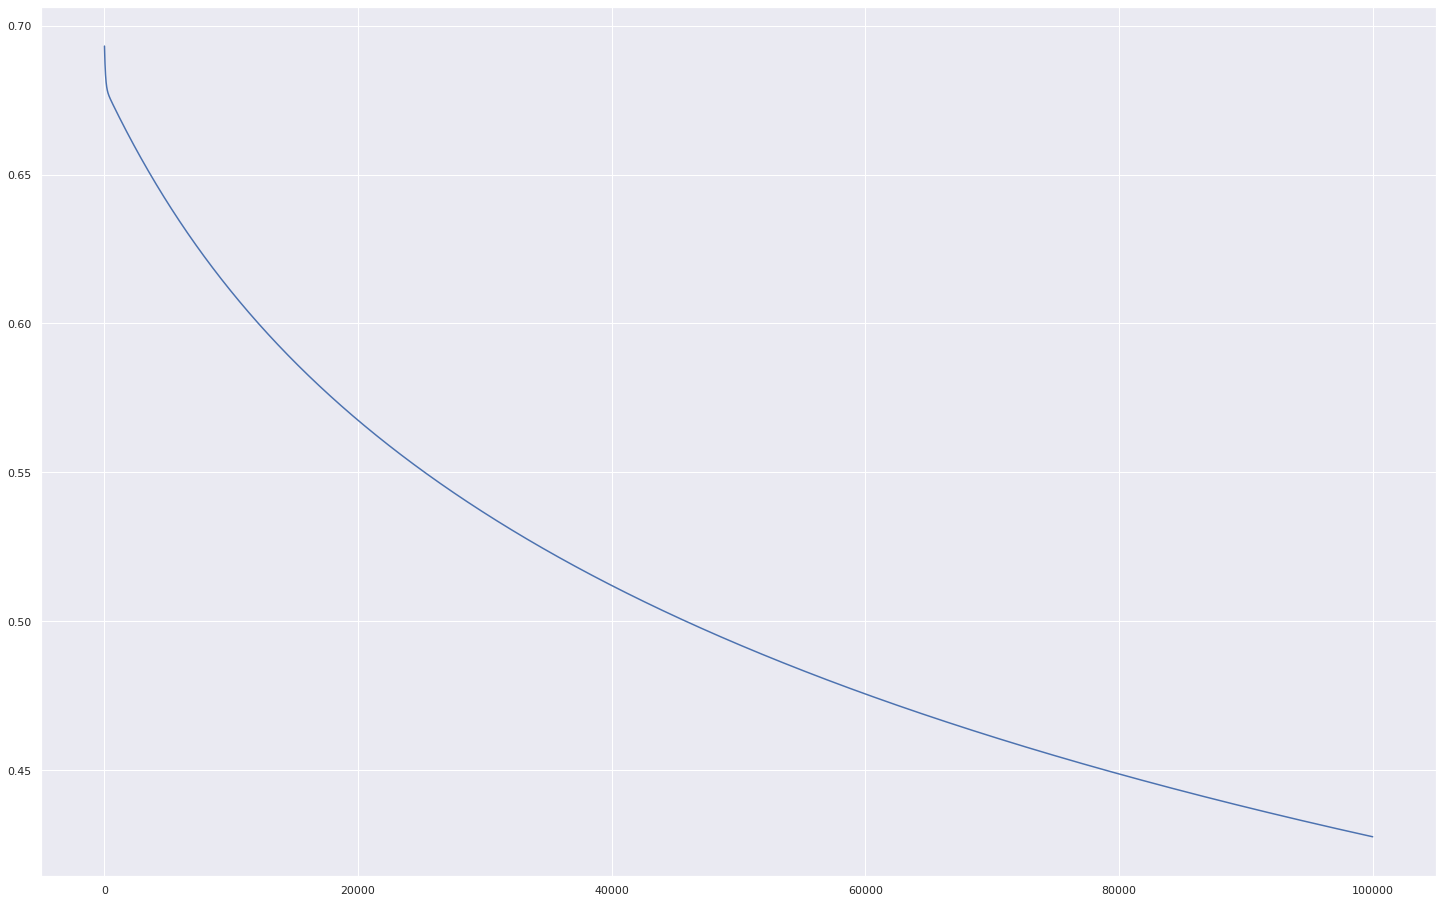

In [ ]:
plt.plot(np.arange(iterations), lista_costo)
plt.show()

In [ ]:
accuracy(x_train, y_train, w, b)

La precision del modelo es:  88.64 %


In [ ]:
accuracy(x_test, y_test, w, b)

La precision del modelo es:  95.38 %
